## Predict Baseball Strike Zones With Machine Learning
Support Vector Machines are powerful machine learning models that can make complex decision boundaries. An SVM’s decision boundary can twist and curve to accommodate the training data.

In this project, we will use an SVM trained using a baseball dataset to find the decision boundary of the strike zone.

<img src="02_baseball.png" width="400px;">

The strike zone can be thought of as a decision boundary that determines whether or not a pitch is a strike or a ball. There is a strict definition of the strike zone: however, in practice, it will vary depending on the umpire or the player at bat.

Let’s use our knowledge of SVMs to find the real strike zone of several baseball players.

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [232]:
aaron_judge_data = 'https://raw.githubusercontent.com/Suraj-Patro/Baseball_Data_Analysis/main/datasets/judge.csv'
aaron_judge_raw = pd.read_csv(aaron_judge_data)
# make copy
aaron_judge = aaron_judge_raw.copy()
aaron_judge.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
0,FF,2017-09-30,95.7,-2.3581,5.9240,Aaron Judge,592450,608678,strikeout,swinging_strike,...,54.0129,0.0,0.0,0.0,1.0,0.0,0.0,NaN,53,3
1,FF,2017-09-30,96.3,-2.5577,5.9023,Aaron Judge,592450,608678,NaN,called_strike,...,54.1114,0.0,0.0,NaN,NaN,NaN,NaN,NaN,53,2
2,FF,2017-09-30,95.2,-2.3861,5.8346,Aaron Judge,592450,608678,NaN,called_strike,...,54.0285,0.0,0.0,NaN,NaN,NaN,NaN,NaN,53,1
3,FT,2017-09-30,93.4,4.2502,4.6506,Aaron Judge,592450,571901,walk,ball,...,54.7309,0.0,0.0,0.7,1.0,0.0,0.0,NaN,36,5
4,FT,2017-09-30,92.8,4.1144,4.4696,Aaron Judge,592450,571901,NaN,called_strike,...,54.5228,0.0,0.0,NaN,NaN,NaN,NaN,NaN,36,4


In [233]:
giancarlo_stanton_csv = 'https://raw.githubusercontent.com/Suraj-Patro/Baseball_Data_Analysis/main/datasets/stanton.csv'
standon_raw = pd.read_csv(giancarlo_stanton_csv)
# make copy
standon = standon_raw.copy()
standon.head()
standon.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
0,SL,2017-10-01,86.4,-1.0592,5.9057,Giancarlo Stanton,519317,527055,strikeout,swinging_strike,...,54.7356,0.000,0.000,0.0,1.0,0.0,0.0,NaN,80,4
1,FF,2017-10-01,98.1,-1.5517,5.7016,Giancarlo Stanton,519317,527055,NaN,foul,...,54.9704,0.000,0.000,NaN,NaN,NaN,NaN,4.0,80,3
2,FT,2017-10-01,97.0,-1.3408,5.6190,Giancarlo Stanton,519317,527055,NaN,foul,...,54.3777,0.000,0.000,NaN,NaN,NaN,NaN,NaN,80,2
3,FT,2017-10-01,98.0,-1.4515,5.8013,Giancarlo Stanton,519317,527055,NaN,foul,...,54.6421,0.000,0.000,NaN,NaN,NaN,NaN,3.0,80,1
4,FT,2017-10-01,94.2,-0.9315,7.0124,Giancarlo Stanton,519317,462382,field_out,hit_into_play,...,54.6464,0.048,0.045,0.0,1.0,0.0,0.0,2.0,64,6


## Create labels

In [234]:
# check column names
aaron_judge.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'pos2_person_id', 'umpire',
       'sv_id', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pos1_person_id',
       'pos2_person_id.1', 'pos3_person_id', 'pos4_person_id',
       'pos5_person_id', 'pos6_person_id', 'pos7_person_id', 'pos8_person_id',

In [235]:
# look at unique values in 'description'
aaron_judge.description.unique()

array(['swinging_strike', 'called_strike', 'ball', 'hit_into_play_score',
       'foul', 'blocked_ball', 'hit_into_play', 'hit_into_play_no_out',
       'swinging_strike_blocked', 'foul_tip', 'automatic_ball',
       'hit_by_pitch'], dtype=object)

In [236]:
# whether a pitch was a ball or strike is in 'type':
aaron_judge.type.unique()

array(['S', 'B', 'X'], dtype=object)

Great! We know every row’s type feature is either an 'S' for a strike, a 'B' for a ball, or an 'X' for neither (for example, an 'X' could be a hit or an out).

We’ll want to use this feature as the label of our data points. However, instead of using strings, it will be easier if we change every 'S' to a 1 and every 'B' to a 0.

In [237]:
# change all S to 1 and B to 0 in 'type'
aaron_judge.type = aaron_judge.type.map({'S': 1, 'B': 0})

In [238]:
# sanity check
aaron_judge.type.head(5)

0    1.0
1    1.0
2    1.0
3    0.0
4    1.0
Name: type, dtype: float64

We want to predict whether a pitch is a ball or a strike based on its location over the plate. You can find the ball’s location in the columns plate_x and plate_z. These are measures of how ner the home plate ths pitch was (eg plate_x=0 means pitch was directly in middle, negative to left and pos to right, plate_z is a emasure of how high off the ground the pitch was).

In [239]:
aaron_judge['plate_x'].head()

0    1.0150
1    0.4546
2    0.0957
3    1.5161
4    0.0764
Name: plate_x, dtype: float64

In [240]:
# check for nans
aaron_judge[['type', 'plate_x', 'plate_z']].isna().sum()

type       381
plate_x     41
plate_z     41
dtype: int64

In [241]:
# drop nans from plate_x, plate_y, type
aaron_judge = aaron_judge.dropna(subset=['type', 'plate_x', 'plate_z'])
# check it worked
aaron_judge[['type', 'plate_x', 'plate_z']].isna().sum()

type       0
plate_x    0
plate_z    0
dtype: int64

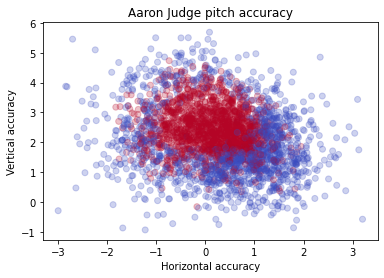

In [242]:
# plot
ax = plt.scatter(aaron_judge.plate_x, aaron_judge.plate_z, c=aaron_judge.type, cmap='coolwarm', alpha=0.25)
plt.xlabel('Horizontal accuracy')
plt.ylabel('Vertical accuracy')
plt.title('Aaron Judge pitch accuracy')
plt.show()

## Building the SVM

In [217]:
# train test split
training_set, validation_set = train_test_split(aaron_judge, random_state=1)


In [218]:
# train classifier
classifier = SVC(kernel='rbf')
classifier.fit(training_set[['plate_x', 'plate_z']], training_set['type'])

SVC()

In [219]:
# function from [Python DS Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

/Users/learning/opt/miniconda3/envs/std/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


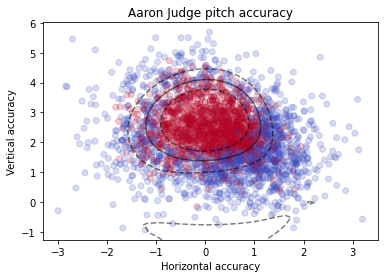

In [220]:
# plot
plt.scatter(aaron_judge.plate_x, aaron_judge.plate_z, c=aaron_judge.type, cmap='coolwarm', alpha=0.2)
plt.xlabel('Horizontal accuracy')
plt.ylabel('Vertical accuracy')
plt.title('Aaron Judge pitch accuracy')
plot_svc_decision_function(classifier)
plt.show()


## Optimizing the SVM

In [221]:
print("Initial accuracy on train data: {:.3f}".format(classifier.score(training_set[['plate_x', 'plate_z']], training_set['type'])))
print("Initial accuracy on validation data: {:.3f}".format(classifier.score(validation_set[['plate_x', 'plate_z']], validation_set['type'])))

Initial accuracy on train data: 0.832
Initial accuracy on validation data: 0.837


In [222]:
# example with gamma=100, C=100
classifier100 = SVC(kernel='rbf', gamma=100, C=100)
classifier100.fit(training_set[['plate_x', 'plate_z']], training_set['type'])
print("Classifier100 accuracy on train data: {:.3f}".format(classifier100.score(training_set[['plate_x', 'plate_z']], training_set['type'])))
print("Classifier100 accuracy on validation data: {:.3f}".format(classifier100.score(validation_set[['plate_x', 'plate_z']], validation_set['type'])))

Classifier100 accuracy on train data: 0.965
Classifier100 accuracy on validation data: 0.780


Note accuracy on training data has increased and accuracy on validation has gone down -> overfitting

In [223]:
classifiers = []
accuracies = []

for i in range (1, 20, 1):
    for j in range(1, 20, 1):
        classifier = SVC(kernel='rbf', gamma=i, C=j)
        classifier.fit(training_set[['plate_x', 'plate_z']], training_set['type'])
        accuracy_train = classifier.score(training_set[['plate_x', 'plate_z']], training_set['type'])
        accuracy_validation = classifier.score(validation_set[['plate_x', 'plate_z']], validation_set['type'])
        classifiers.append([i, j])
        accuracies.append([accuracy_train, accuracy_validation])
    

In [224]:
# sorts accuracies by validation accuracy and returns best (last item in sorted list)
best = (sorted(accuracies, key=lambda x : x[1]))[-1]

# returns best gamma and C values from list
vals = classifiers[accuracies.index(best)]

print("Best values are gamma = {} and C = {}".format(vals[0], vals[1]))
print("Accuracy on training data is: {:.3f} and accuracy on validation data is {:.3f}".format(best[0], best[1]))

Best values are gamma = 10 and C = 2
Accuracy on training data is: 0.845 and accuracy on validation data is 0.846


## Write as function

In [225]:
def prepdata(player):
	# convert type to numerical
    player.type = player.type.map({'S': 1, 'B': 0})
	# drop nans from plate_x, plate_y, type
    player = player.dropna(subset=['type', 'plate_x', 'plate_z'], inplace=True)

	
def trainsvm(player, val):
	# player determines dataset to use
	# val determines range for gamma and C optimization
	# train test split
    training_set, validation_set = train_test_split(player, random_state=1)
	# train classifier
    classifiers = []
    accuracies = []
    for i in range (1, val, 1):
        for j in range(1, val, 1):
            classifier = SVC(kernel='rbf', gamma=i, C=j)
            classifier.fit(training_set[['plate_x', 'plate_z']], training_set['type'])
            accuracy_train = classifier.score(training_set[['plate_x', 'plate_z']], training_set['type'])
            accuracy_validation = classifier.score(validation_set[['plate_x', 'plate_z']], validation_set['type'])
            classifiers.append([i, j])
            accuracies.append([accuracy_train, accuracy_validation])
    
    # sorts accuracies by validation accuracy and returns best (last item in sorted list)
    best = (sorted(accuracies, key=lambda x : x[1]))[-1]

	# returns best gamma and C values from list
    vals = classifiers[accuracies.index(best)]

    print("Best values are gamma = {} and C = {}".format(vals[0], vals[1]))
    print("Accuracy on training data is: {:.3f} and accuracy on validation data is {:.3f}".format(best[0], best[1]))


In [243]:
prepdata(aaron_judge_raw)

In [247]:
trainsvm(aaron_judge_raw, 3)

Best values are gamma = 1 and C = 2
Accuracy on training data is: 0.837 and accuracy on validation data is 0.840


In [245]:
prepdata(standon_raw)

In [248]:
trainsvm(standon_raw, 10)

Best values are gamma = 1 and C = 3
Accuracy on training data is: 0.825 and accuracy on validation data is 0.820


## Plot all k values

In [314]:
# create lists
gamma_vals = []
c_vals = []
train_accuracies = []
validation_accuracies = []

# populate lists
for i in range(len(classifiers)):
    gamma_vals.append(classifiers[i][0])
    c_vals.append(classifiers[i][1])
for i in range(len(accuracies)):
    train_accuracies.append(accuracies[i][0])
    validation_accuracies.append(accuracies[i][1])

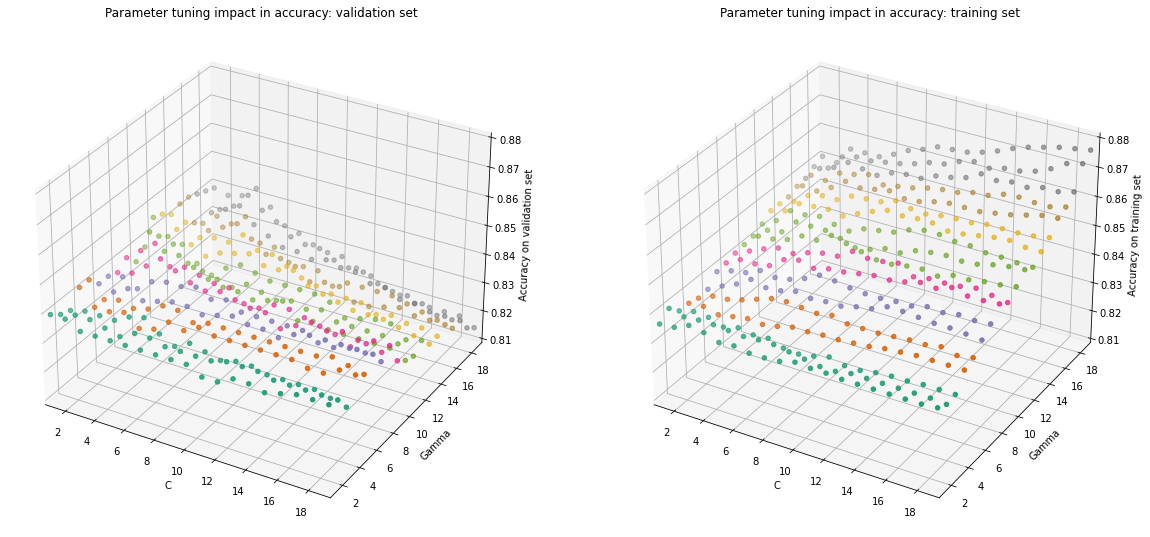

In [370]:
# 3d plot
from mpl_toolkits import mplot3d
# 3D subplots https://matplotlib.org/stable/gallery/mplot3d/subplot3d.html
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=(20, 10))

# add first subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

ydata = gamma_vals
xdata = c_vals
zdata = validation_accuracies
# plot title
ax.set_title("Parameter tuning impact in accuracy: validation set")
# axis labels
ax.set_xlabel("C")
ax.set_zlabel("Accuracy on validation set")
ax.set_ylabel("Gamma")
# set x and y axis limits to parameter ranges
ax.set_ylim(1, 19)
ax.set_xlim(1, 19)
# set z axis so both plots scaled the same
ax.set_zlim(0.81, 0.88)
ax.scatter3D(xdata, ydata, zdata, c=ydata, cmap='Dark2')

# second subplot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ydata = gamma_vals
xdata = c_vals
zdata = train_accuracies
# plot title
ax.set_title("Parameter tuning impact in accuracy: training set")
# axis labels
ax.set_xlabel("C")
ax.set_zlabel("Accuracy on training set")
ax.set_ylabel("Gamma")
# set axis limits to parameter ranges
ax.set_ylim(1, 19)
ax.set_xlim(1, 19)
# set z axis so both plots scaled the same
ax.set_zlim(0.81, 0.88)

ax.scatter3D(xdata, ydata, zdata, c=ydata, cmap='Dark2')